In [1]:
!pip3 install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.2 MB/s eta 0:00:00


In [3]:
import pygad
import numpy as np
import random

ITER = 5000
SAMPLE = 200

# numero de curules de cada partido
listaCurules = np.array([8,8,16,13,5])

# peso politico de cada entidad
entidades = np.array([71,20,63,5,83,46,49,37,2,26,
             49,99,85,46,83,37,15,40,40,13,
             84,48,97,64,15,38,50,49,19,59,
             39,73,52,4,57,24,75,98,5,25,
             39,48,91,32,77,81,4,21,11,63])

# generar lista de cromosomas
# cada 3 bits representan una entidad e indican a que partido pertenece
cList = np.zeros((SAMPLE,150))
for i in range(SAMPLE):
  for j in range(150):
    if random.random() > 0.5:
      cList[i][j] = 1

# evaluacion
apt = np.zeros(SAMPLE)
def eval(ga_instance, list, list_idx):
  curules = np.zeros(5)
  curules[:] = listaCurules
  apt = 0
  for i in range(len(list)):
    n = list[i]
    if n == 0 and curules[0] > 0:
      apt += entidades[i]
    if n <= 4:
      curules[n] -= 1
    else:
      apt -= 25
  for i in range(len(curules)):
    if curules[i] < 0:
      apt -= abs(curules[i]*20)
  apt = max(apt,1)
  return apt

ga_instance = pygad.GA(num_generations=ITER,
                       num_parents_mating=SAMPLE//2,
                       fitness_func=eval,
                       sol_per_pop=SAMPLE,
                       num_genes=50,
                       gene_type=np.int8,
                       init_range_low=0,
                       init_range_high=4,
                       parent_selection_type="rws",
                       keep_parents=0,
                       crossover_type="single_point",
                       mutation_type="random",
                       mutation_percent_genes=0.01,
                       gene_space=[0,1,2,3,4])

ga_instance.run()

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=0.01) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause

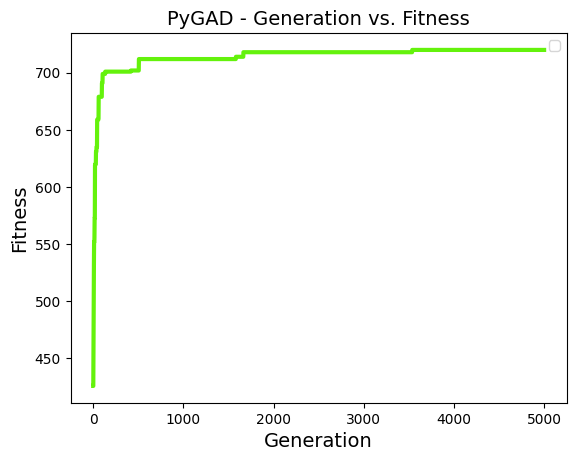

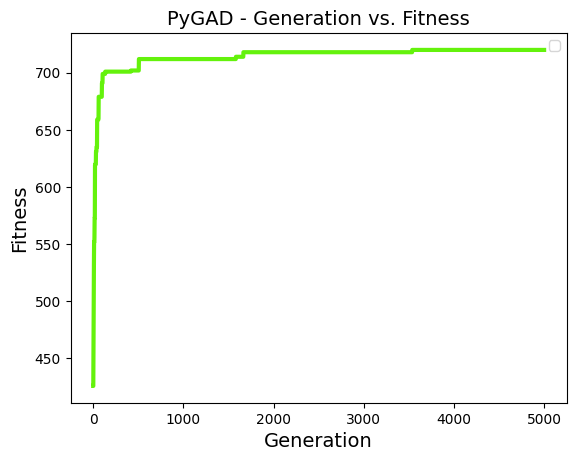

In [4]:
ga_instance.plot_fitness()

In [5]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

Parameters of the best solution : [2 3 3 3 0 2 3 3 4 2 1 0 0 2 0 2 3 3 3 2 0 4 0 2 2 2 2 1 2 3 2 1 1 4 2 1 2
 0 2 3 1 3 0 1 1 4 3 4 2 3]
Fitness value of the best solution = 720.0
Index of the best solution : 0
